In [248]:
%load_ext autoreload
%autoreload 2
import numpy as np
from util_classes import *
from program import *

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
def SIRvisualize(days = 70, N=int(1e4), init = 10, alpha=0.05, beta=0.00005, 
                 d0 = 0, br = 0, name=''):
    axis = np.arange(0,days+1,1)
    if br == 0: br = len(Xaxis)
    SIRmodel = SIRModel(N, init, alpha, beta, d0, days)
    for i in range(days):
        if br-1 > 0 and i == br-1: break
        SIRmodel.oneStep()
    S = SIRmodel.timeSeries['S']
    I = SIRmodel.timeSeries['I']
    R = SIRmodel.timeSeries['R']
    D = SIRmodel.timeSeries['D']
    data_info = [[[axis[:br],S],'-','S'],[[axis[:br],I],'-','I'],
                 [[axis[:br],R],'-','R'],[[axis[:br],D],'-','D']]   
    data_dI = [[[axis[:br],SIRmodel.incremI[1]],'-','dI']]
    plot_2D(data_info,title='SIRD curves',input_label='T',output_label='number of people',
            axis_bounds=None,xscale=None,yscale=None,bloc='best',save=(True,name+'_SIRvisual'))
    plot_2D(data_dI,title='Daily increment of I',input_label='T',output_label='number of people',
            axis_bounds=None,xscale=None,yscale=None,bloc='best',save=(True,name+'_dI'))

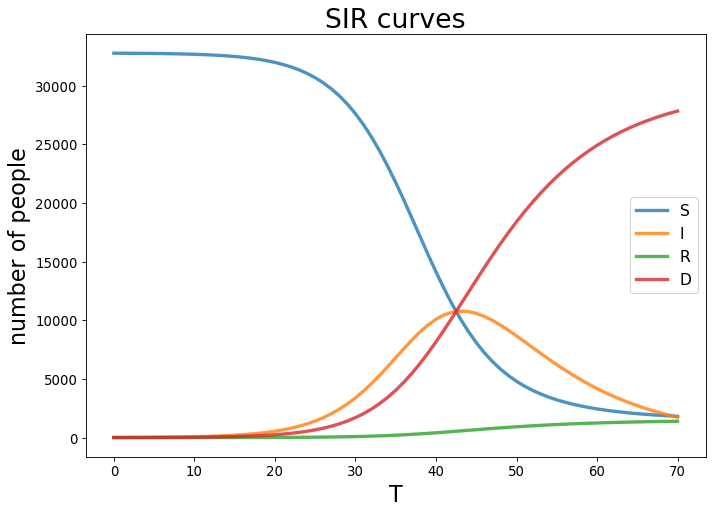

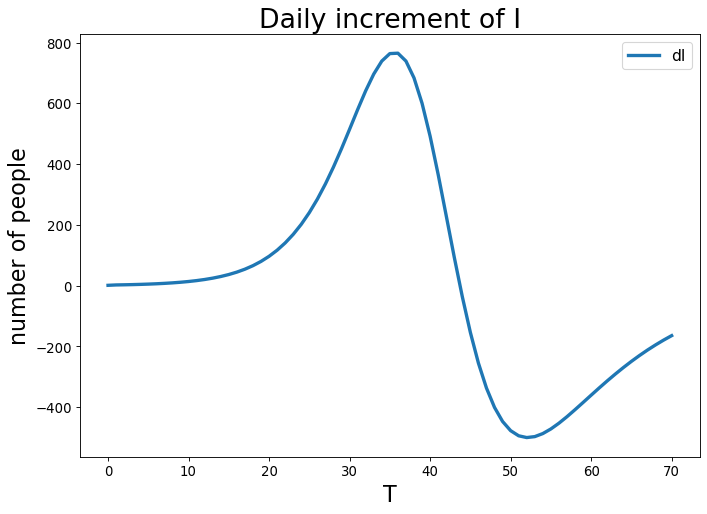

In [452]:
initial = 10; N = 32776
alpha=0.005; beta=0.00001; d0 = 0.1

SIRvisualize(days = 70, N = N, init = initial, alpha = alpha, beta = beta, d0 = d0,br=0)

In [424]:
[days, minutes], SIR, fullnum_time, q_time, bg_time, WT_time = program(days = 70, numOR = 10, init = 10, 
                                                 alpha=0.01, beta=0.0001, d0 = 0, sg_prob=0.15,
                                                 util = 0.8, limit = 5,
                                                 debug = True)



Estimated population :32776

Backlog S patients # :4916, percent = 15.003357138497222

BEGIN day 0 -- we have I:10, S:32766, R:0, D:0

END day 0 -- we have I:10, S:32766, R:0, D:0

BEGIN day 1 -- we have I:42, S:32733, R:0, D:1

END day 1 -- we have I:15, S:32732, R:27, D:2

BEGIN day 2 -- we have I:63, S:32682, R:27, D:4

END day 2 -- we have I:14, S:32673, R:76, D:13

BEGIN day 3 -- we have I:59, S:32627, R:76, D:14

END day 3 -- we have I:13, S:32616, R:122, D:25

BEGIN day 4 -- we have I:55, S:32573, R:122, D:26

END day 4 -- we have I:16, S:32559, R:161, D:40

BEGIN day 5 -- we have I:67, S:32506, R:161, D:42

END day 5 -- we have I:14, S:32492, R:214, D:56

BEGIN day 6 -- we have I:59, S:32446, R:214, D:57

END day 6 -- we have I:17, S:32430, R:256, D:73

BEGIN day 7 -- we have I:71, S:32374, R:256, D:75

END day 7 -- we have I:16, S:32365, R:311, D:84

BEGIN day 8 -- we have I:67, S:32313, R:311, D:85

END day 8 -- we have I:15, S:32300, R:363, D:98

BEGIN day 9 -- we have I:63,

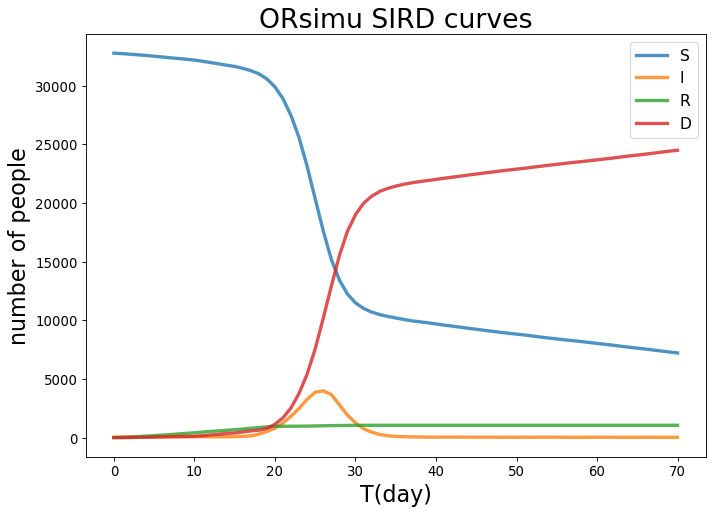

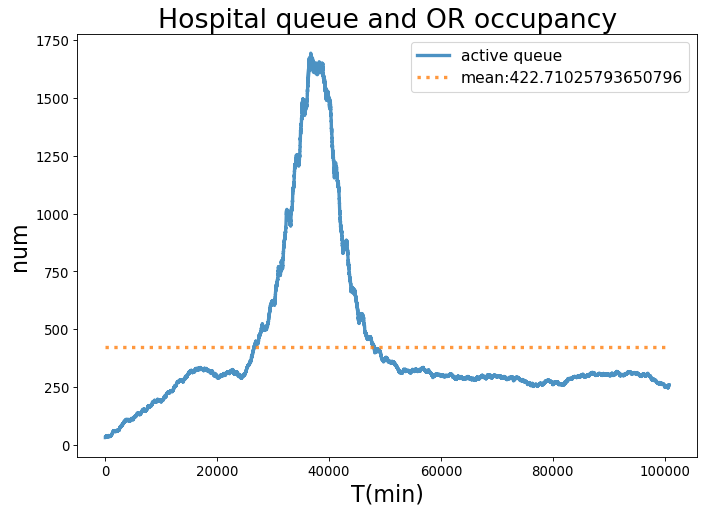

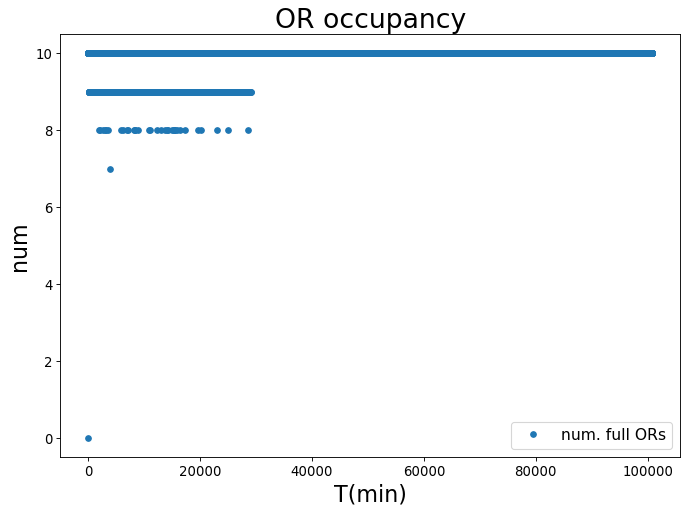

mean waititng time in min.:
Elec:6789.689701173959, NonE:1430.051742344245, I:694.9641723141083



In [453]:
dayAxis = np.arange(0,days+1,1)
# [dayAxis,SIR.timeSeries['S']],'-','S']
data_info = [[[dayAxis,SIR.timeSeries['S']],'-','S'],[[dayAxis,SIR.timeSeries['I']],'-','I'],
                 [[dayAxis,SIR.timeSeries['R']],'-','R'],[[dayAxis,SIR.timeSeries['D']],'-','D']] 
plot_2D(data_info,title='ORsimu SIRD curves',input_label='T(day)',output_label='number of people',
            axis_bounds=None,xscale=None,yscale=None,bloc='best',save=(True,'ORsimu_SIR'))

tAxis = np.arange(0,minutes,1)
# [[tAxis,bg_time],'-','backlog']
queues_data = [[[tAxis,q_time],'-','active queue'], 
               [[[0,tAxis[-1]],[np.mean(q_time),np.mean(q_time)]],':',f'mean:{np.mean(q_time)}']
                 ] 
plot_2D(queues_data,title='Hospital queue and OR occupancy',input_label='T(min)',output_label='num',
            axis_bounds=None,xscale=None,yscale=None,bloc='best',save=(True,'hospitalQueue'))

queues_data = [[[tAxis,fullnum_time],'.','num. full ORs']] 
plot_2D(queues_data,title='OR occupancy',input_label='T(min)',output_label='num',
            axis_bounds=None,xscale=None,yscale=None,bloc='best',save=(True,'onlyOR'))

meanElec = np.mean(WT_time['Elec'])
meanNonE = np.mean(WT_time['NonE'])
meanI = np.mean(WT_time['I'])
print('mean waititng time in min.:')
print(f'Elec:{meanElec}, NonE:{meanNonE}, I:{meanI}\n')